# Wikipedia Content Topics Modeling

In [1]:
# check version
from pycaret.utils import version
version()

'3.0.0.rc3'

# 1. Loading Dataset

In [2]:
from pycaret.datasets import get_data
data = get_data('wikipedia')

,Title,Category,Text
0,Apple Inc.,Information Technology,nasdaq 100 component s p 500 component founda...
1,than the previous version and minor positionin...,NaN,NaN
2,the life and times of macintosh the computer ...,NaN,NaN
3,Adobe Systems,Information Technology,br nasdaq 100 nasdaq 100 component br s p 500...
4,General Motors,Consumer Discretionary,s p 500 s p 500 component industry automotive...


<AxesSubplot: >

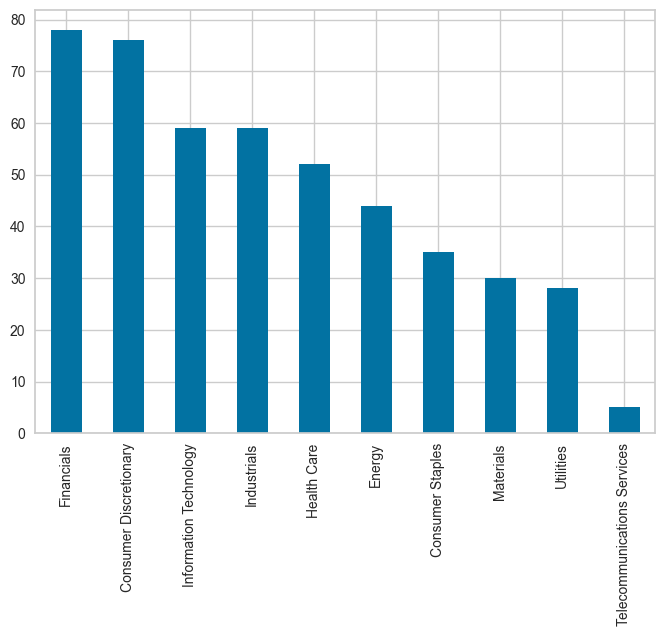

In [31]:
data['Category'].value_counts().plot(kind='bar')

# 2. Initialize Setup

In [3]:
from pycaret.nlp import *
nlp1 = setup(data, target = 'Text', session_id=123, log_experiment=True, log_plots = True, experiment_name='wikipedia_1')

Description,Value
session_id,123
Documents,500
Vocab Size,21283
Custom Stopwords,False


# 3. Create Model

In [4]:
models()

,Name,Reference
ID,,
lda,Latent Dirichlet Allocation,gensim/models/ldamodel
lsi,Latent Semantic Indexing,gensim/models/lsimodel
hdp,Hierarchical Dirichlet Process,gensim/models/hdpmodel
rp,Random Projections,gensim/models/rpmodel
nmf,Non-Negative Matrix Factorization,sklearn.decomposition.NMF


In [5]:
lda = create_model('lda')

In [32]:
lda_2 = create_model('lda', num_topics=10)

In [37]:
nmf = create_model('nmf', num_topics = 10)

# 4. Assign Labels

In [33]:
lda_results = assign_model(lda)
lda_results.head()

,Title,Category,Text,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,Apple Inc.,Information Technology,nasdaq_component component_foundation founder ...,0.084751,0.000094,0.908400,0.006755,Topic 2,0.91
1,than the previous version and minor positionin...,NaN,,0.198910,0.442219,0.116910,0.241962,Topic 1,0.44
2,the life and times of macintosh the computer ...,NaN,,0.198910,0.442219,0.116910,0.241962,Topic 1,0.44
3,Adobe Systems,Information Technology,br_component industry computer software founde...,0.089277,0.000124,0.901963,0.008636,Topic 2,0.90
4,General Motors,Consumer Discretionary,component industry automotive industry automot...,0.069953,0.196426,0.582502,0.151120,Topic 2,0.58


In [7]:
lda_results = assign_model(lda)
lda_results.head()

,Title,Category,Text,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,Apple Inc.,Information Technology,nasdaq_component component_foundation founder ...,0.084753,0.000094,0.908401,0.006753,Topic 2,0.91
1,than the previous version and minor positionin...,NaN,,0.198910,0.442219,0.116910,0.241962,Topic 1,0.44
2,the life and times of macintosh the computer ...,NaN,,0.198910,0.442219,0.116910,0.241962,Topic 1,0.44
3,Adobe Systems,Information Technology,br_component industry computer software founde...,0.089274,0.000124,0.901963,0.008639,Topic 2,0.90
4,General Motors,Consumer Discretionary,component industry automotive industry automot...,0.069962,0.196422,0.582501,0.151116,Topic 2,0.58


# 5. Analyze Model

In [34]:
plot_model(lda)

In [8]:
plot_model(lda)

In [9]:
plot_model(lda, plot = 'bigram')

In [35]:
plot_model(lda, plot = 'tsne')

In [10]:
plot_model(lda, plot = 'tsne')

In [ ]:
plot_model(lda, plot = 'topic_distribution')

In [13]:
plot_model(lda, plot = 'topic_distribution')

# 6. Evaluate Model

In [11]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

In [27]:
models()

,Name,Reference
ID,,
lda,Latent Dirichlet Allocation,gensim/models/ldamodel
lsi,Latent Semantic Indexing,gensim/models/lsimodel
hdp,Hierarchical Dirichlet Process,gensim/models/hdpmodel
rp,Random Projections,gensim/models/rpmodel
nmf,Non-Negative Matrix Factorization,sklearn.decomposition.NMF


# 7. Tune Model

In [43]:
#%tb 
#model_lda_tune = tune_model(lda, supervised_target = 'Category', multi_core=True) # error
#assign_model(model_lda_tune)
# evaluate_model(model_lda_tune)

# 8. Experiments Tracking with MLFlow

In [ ]:
!mlflow ui